In [67]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
rng = np.random.default_rng()

### Week 10

### 1. Discrete cosine transform (15 pts)

(a) 5 points Define a function to calculate
$fs(t) = sin(2πν_1t) + cos(2πν_2t)$
and set ν1 = 20 kHz, ν2 = 25 kHz.
Make an array of sampling times with N = 1000 points starting at
t = 0 and with a time interval between successive points τ = 2 μs.
Plot the function fs(t) evaluated at the sampled points, vs time..
You should see a pattern of “beats” at the difference frequency
ν2 − ν1.

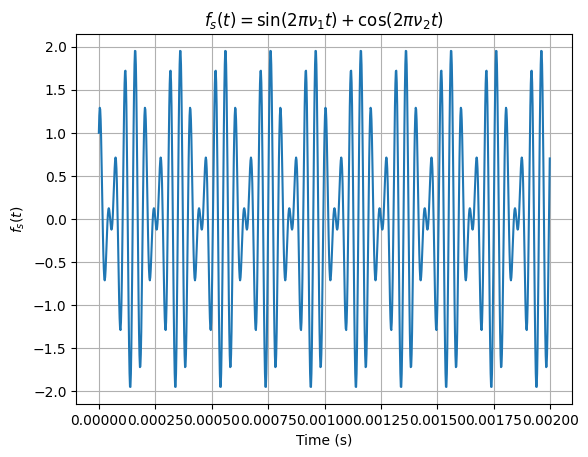

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def fs(t, nu1=20e3, nu2=25e3):
    return np.sin(2 * np.pi * nu1 * t) + np.cos(2 * np.pi * nu2 * t)

def a1Plot():
    N = 1000
    tau = 2e-6  # 2 microseconds
    T = tau * np.arange(N)
    Y = fs(T)
    
    plt.figure()
    plt.plot(T, Y)
    plt.xlabel('Time (s)')
    plt.ylabel(r'$f_s(t)$')
    plt.title(r'$f_s(t) = \sin(2 \pi \nu_1 t) + \cos(2 \pi \nu_2 t)$')
    plt.grid(True)
    plt.show()

a1Plot()

(b) (10 points) Apply the discrete cosine transform to your sampled
function data. Make an array of the frequencies for the discrete
cosine data – this is an array of N points with the frequency of
the kth point equal to νk = k/(2N τ ). Note this is a factor of two
different from νk for the discrete Fourier transform.
Plot the absolute value of the DCT data versus frequency - you
should see two clear peaks at ν1, ν2.

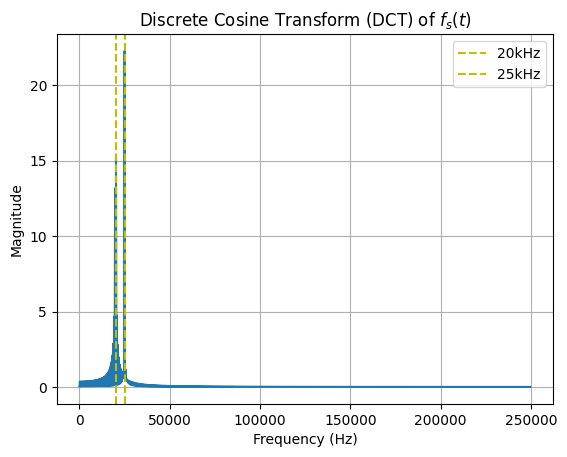

In [69]:
from scipy.fftpack import dct
import numpy as np
import matplotlib.pyplot as plt

def b1(min, max, steps):
    T = np.linspace(min, max, steps)
    fs_t = fs(T)
    fs_dct = dct(fs_t, norm='ortho')

    tau = 2e-6

    N = steps
    k = np.arange(N)
    freqs = k / (2 * N * tau)

    # Plot
    plt.figure()
    plt.plot(freqs, np.abs(fs_dct))
    plt.title('Discrete Cosine Transform (DCT) of $f_s(t)$')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.axvline(20000, color = 'y', linestyle = '--', label = '20kHz')
    plt.axvline(25000, color = 'y', linestyle = '--', label = '25kHz')
    plt.legend()
    plt.grid(True)
    plt.show()

b1(0, 2, 1000)

### 2. Filtering Noise (25 pts)

(a) 5 points Make a new data set by adding random noise with stan-
dard deviation σ = 0.7 to the sampled fs(t) from the previous
activity. If your previous sampled data is in an array f with nn
elements, you can do this as follows:

#func for normally-distributed random numbers

rng = np.random.default_rng()

f2 = f + rng.normal(0.,0.7, len(f))

Plot this new noisy sampled data verus time - the beat pattern
should be barely visible due to the noise.

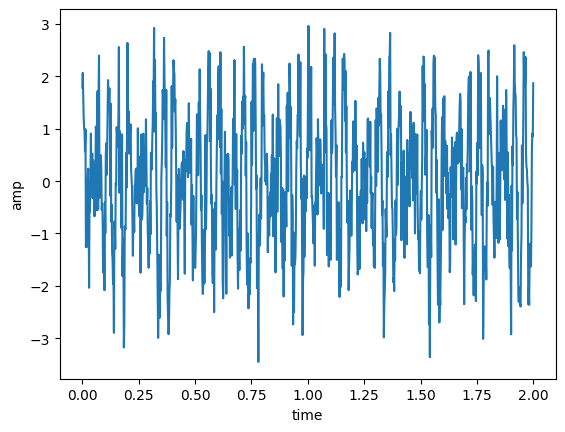

In [70]:
def noise2a(min, max, steps, nu1 = 20e3, nu2 = 25e3):
    T = np.linspace(min, max, steps)
    f = fs(T, nu1, nu2) + rng.normal(0., 0.7, len(T))
    plt.figure()
    plt.plot(T, f)
    plt.xlabel('time')
    plt.ylabel('amp')
    plt.show()
noise2a(0, 2, 1000)


(b) 5 points Apply the DCT to the noisy data - you should still see
the peaks at ν1, ν2 but now there should be random noise across
the whole frequency range. This is called “white noise”.

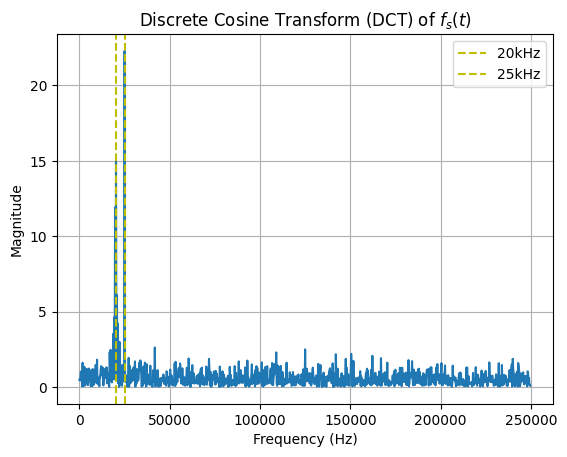

In [71]:
def noise2b(min, max, steps, nu1 = 20e3, nu2 = 25e3):
    T = np.linspace(min, max, steps)
    f = fs(T, nu1, nu2) + rng.normal(0., 0.7, len(T))
    f_dct = dct(f, norm='ortho')
    tau = 2e-6

    N = steps
    k = np.arange(N)
    freqs = k / (2 * N * tau)

    # Plot
    plt.figure()
    plt.plot(freqs, np.abs(f_dct))
    plt.title('Discrete Cosine Transform (DCT) of $f_s(t)$')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.axvline(20000, color = 'y', linestyle = '--', label = '20kHz')
    plt.axvline(25000, color = 'y', linestyle = '--', label = '25kHz')
    plt.legend()
    plt.grid(True)
    plt.show()

noise2b(0, 2, 1000)

(c) 10 points Make a new set of transformed data that are equal to
the transformed noisy data for frequencies ν < νmax, but set to
zero for ν > νmax where νmax is a parameter you can set. This is
called filtering the data – specifically this is a “low-pass filter”.
Plot the filtered transform data for different values of νmax to see
that your code is working.

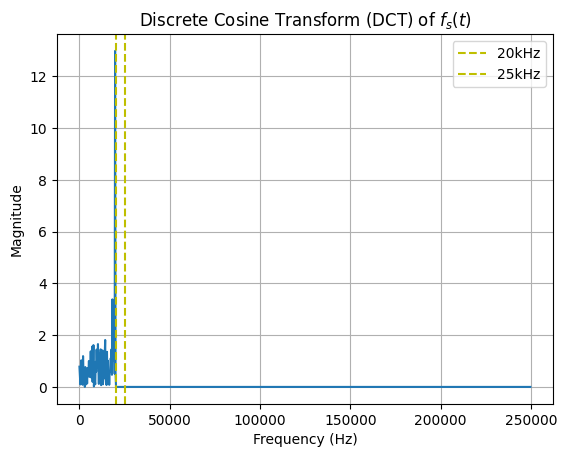

In [72]:
def lowPassFilter(f, frequencies, nuMax):
    mask = frequencies>nuMax
    retVal = np.copy(f)
    retVal[mask]=0
    return retVal

def c2(min, max, steps, numax, nu1 = 20e3, nu2 = 25e3):
    T = np.linspace(min, max, steps)
    f = fs(T, nu1, nu2) + rng.normal(0., 0.7, len(T))
    f_dct = dct(f, norm='ortho')
    tau = 2e-6

    N = steps
    k = np.arange(N)
    freqs = k / (2 * N * tau)

    # Plot
    plt.figure()
    plt.plot(freqs, np.abs(lowPassFilter(f_dct, freqs, numax)))
    plt.title('Discrete Cosine Transform (DCT) of $f_s(t)$')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.axvline(20000, color = 'y', linestyle = '--', label = '20kHz')
    plt.axvline(25000, color = 'y', linestyle = '--', label = '25kHz')
    plt.legend()
    plt.grid(True)
    plt.show()

c2(0, 2, 1000, 20000)

(d) 5 points Apply the inverse discrete cosine transform to your
filtered data setting νmax = 30 kHz and explain why the resulting
time-domain data appears as it does. Try shifting the cutoff to
νmax = 40 kHz, and replot the data. Which is the better upper
limit?

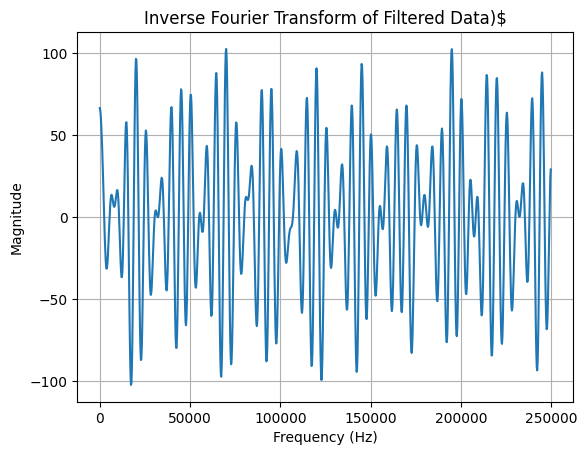

In [73]:
def d2(min, max, steps, numax, nu1 = 20e3, nu2 = 25e3):
    T = np.linspace(min, max, steps)
    f = fs(T, nu1, nu2) + rng.normal(0., 0.7, len(T))
    f_dct = dct(f, norm='ortho')
    tau = 2e-6

    N = steps
    k = np.arange(N)
    freqs = k / (2 * N * tau)
    f_idct = scipy.fftpack.idct(lowPassFilter(f_dct, freqs, numax))

    plt.figure()
    plt.plot(freqs, (f_idct))
    plt.title('Inverse Fourier Transform of Filtered Data)$')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    #plt.axvline(20000, color = 'y', linestyle = '--', label = '20kHz')
    #plt.axvline(25000, color = 'y', linestyle = '--', label = '25kHz')
    #plt.legend()
    plt.grid(True)
    plt.show()
d2(0, 2, 1000, 30000)

### 3. Newman 7.2: Sunspots (15 pts)

(a) (5 points) Make a plot of the sunspots as a function of time. You
should see that the number of sunspots has fluctuated on a regular
cycle for as long as observations have been recorded. Make a rough
estimate of the length of the cycle in months.

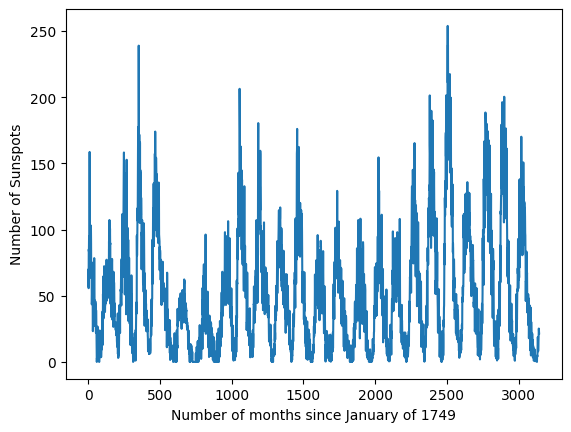

In [74]:
sunspotsData = np.loadtxt('/Users/connormclaughlin/Python Projects/Physics 281/sunspots.txt')
time = sunspotsData[:, 0]
sunspots = sunspotsData[:, 1]
plt.figure()
plt.plot(time, sunspots)
plt.xlabel("Number of months since January of 1749")
plt.ylabel("Number of Sunspots")
plt.show()

periodEst = 125

(b) (5 points) Calculate the Fourier transform of the sunspot data and
then make a graph of the magnitude squared |ck|2 of the Fourier coefficients as a function of k—also called the power spectrum of
the sunspot signal. You should see that there is a noticeable peak
in the power spectrum at a nonzero value of k. The appearance of
this peak tells us that there is one frequency in the Fourier series
that has a higher amplitude than the others around it—meaning
that there is a large sine-wave term with this frequency, which
corresponds to the periodic wave you can see in the original data.

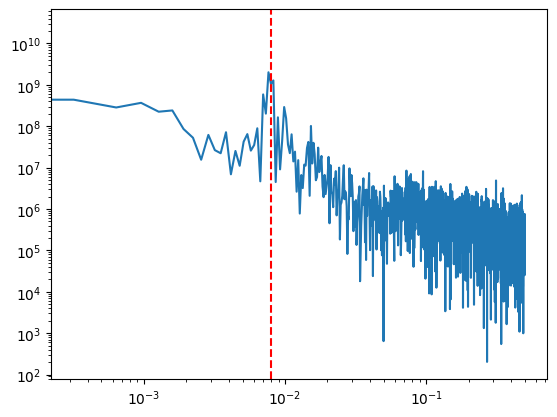

In [75]:
sunspotsFFT = scipy.fft.fft(sunspots)
cK2 = np.abs(sunspotsFFT)**2

freq = np.fft.fftfreq(len(cK2), d=1)

plt.figure()
plt.plot(freq[:len(cK2)//2], cK2[:len(cK2)//2])
plt.axvline(1/125, color = 'r', linestyle = '--')
plt.loglog()
plt.show()

(c) (5 points) Find the approximate value of k to which the peak
corresponds. What is the period of the sine wave with this value
of k? You should find that the period corresponds roughly to the
length of the cycle that you estimated in part (a).

### 4. Spectral Analysis of Musical Sounds

(a) (5 points) Read in the data from the files clarinet.txt and sax-
ophone.txt. (The .txt files are constructed by taking one of the
two stereo channels of the corresponding .wav file and applying a
windowing function. ) Plot both waveforms in time. Label your
axes and title the graphs

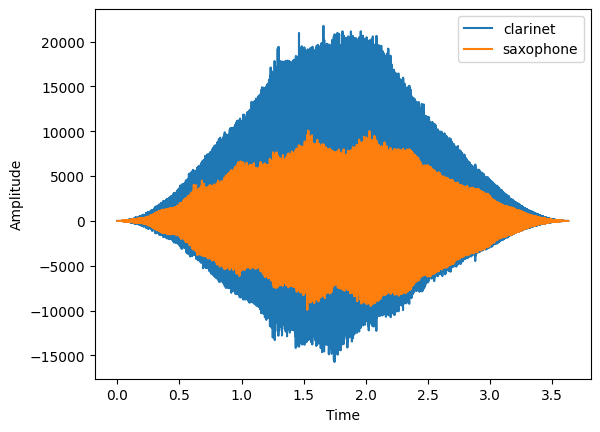

In [76]:
clarinet = np.loadtxt('clarinet.txt')
saxophone = np.loadtxt('saxophone.txt')
#1.75 seconds


timeClar = np.arange(len(clarinet)) / 44.1e3


plt.figure()
plt.plot(timeClar, clarinet, label = 'clarinet')
plt.plot(timeClar, saxophone, label = 'saxophone')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.legend()
plt.show()

(b) (10 points) Use the function scipy.fft.rfft() (appropriate for real
input) to generate the discrete Fourier transform of both data
sets (you can use the function scipy.fft.rfft(), appropriate for real
input). You will note that this array is only half the length of the
original time sequence array. Explain why that is in a markdown
cell. (Hint: it has to do with the Nyquist frequency.) Next, make
an array of frequencies of length N/2 + 1, where N is the length
of the original time data, and plot the magnitude of the Fourier
coefficients from part B as a function of frequency f.
3


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


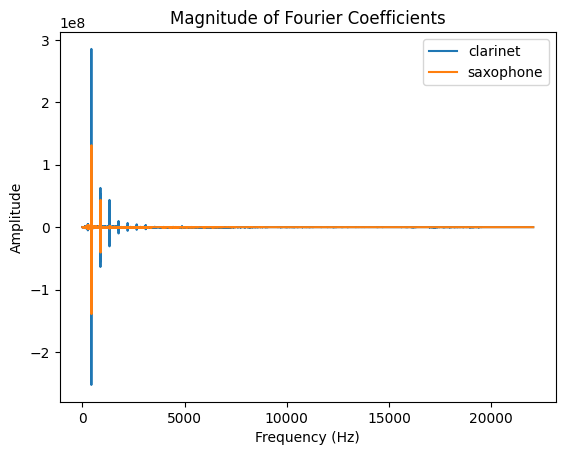

In [135]:
clarinetfft = scipy.fft.rfft(clarinet)
saxfft = scipy.fft.rfft(saxophone)

clarFreq = scipy.fft.rfftfreq(len(clarinet), d=1/(44.1e3))

plt.figure()
plt.plot(clarFreq, clarinetfft, label = 'clarinet')
plt.plot(clarFreq, saxfft, label = 'saxophone')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Magnitude of Fourier Coefficients')
plt.legend()
plt.show()

A fourier series is represented using a real and complex component, this stems from the usage of euler's formula. Since we did a real fourier transform we ignore the complex component, thus reducing the frequencies to half.
rfft works on the supposition that there exists a complex and real symmetry, it therefore removes the complex component for concision.

c) (10 points) Using the subplot command with two rows and 2
columns, put the waveform plots in time in two separate plots
in the first column of your subplots, and the corresponding plots
of the Fourier coefficients as a function of frequency in the second
column. Label your axes and title the graphs

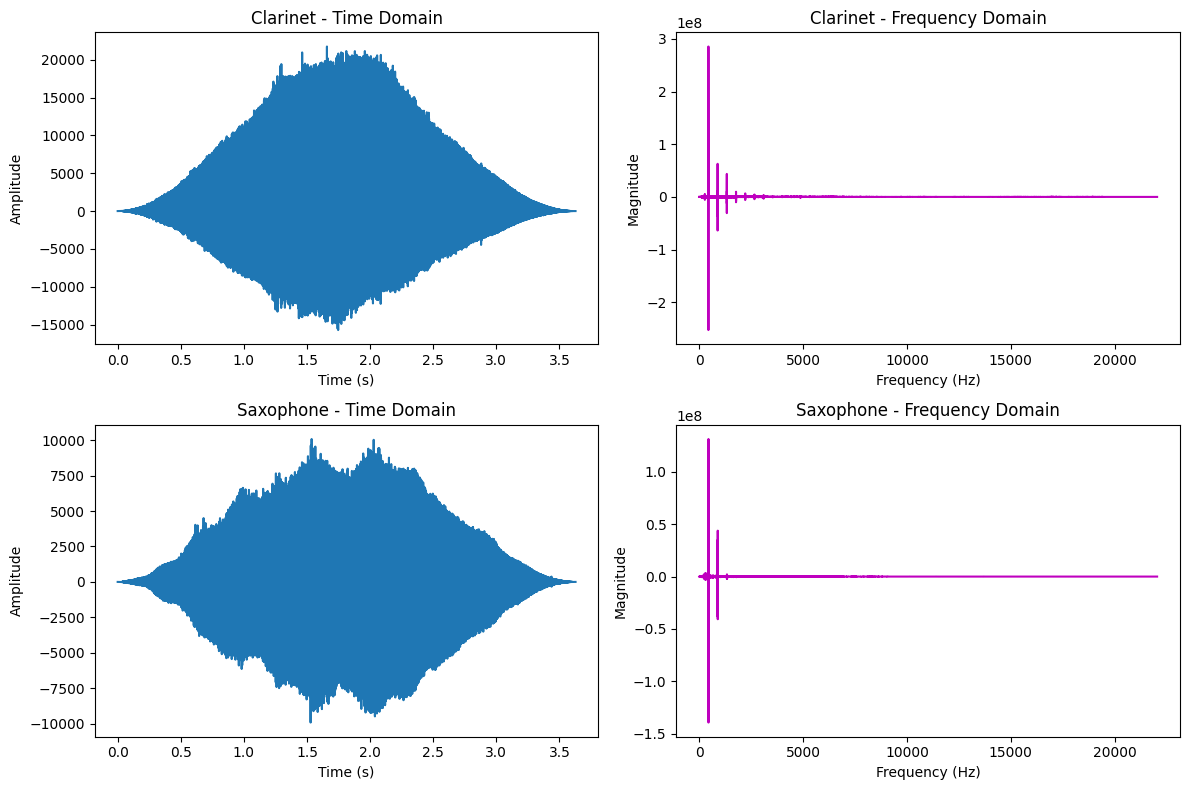

In [136]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax[0,0].plot(timeClar, clarinet)
ax[0,0].set_title('Clarinet - Time Domain')
ax[0,0].set_xlabel('Time (s)')
ax[0,0].set_ylabel('Amplitude')

ax[1,0].plot(timeClar, saxophone)
ax[1,0].set_title('Saxophone - Time Domain')
ax[1,0].set_xlabel('Time (s)')
ax[1,0].set_ylabel('Amplitude')

ax[0,1].plot(clarFreq, clarinetfft, color = 'm')
ax[0,1].set_title('Clarinet - Frequency Domain')
ax[0,1].set_xlabel('Frequency (Hz)')
ax[0,1].set_ylabel('Magnitude')

ax[1,1].plot(clarFreq, saxfft, color = 'm')
ax[1,1].set_title('Saxophone - Frequency Domain')
ax[1,1].set_xlabel('Frequency (Hz)')
#ax[1,1].loglog()
ax[1,1].set_ylabel('Magnitude')

plt.tight_layout()
plt.show()

(d) (5 points) Use your spectra to determine what note is being played
by the two instruments. (As an example, the musical note middle
C has a frequency of 261 Hz). Explain your reasoning.

In [97]:
peak_index_clar = np.argmax(np.abs(clarinetfft))
peak_freq_clar = clarFreq[peak_index_clar]
print(f"Clarinet peak frequency: {peak_freq_clar:.2f} Hz")

peak_index_sax = np.argmax(np.abs(saxfft))
peak_freq_sax = clarFreq[peak_index_sax]
print(f"Clarinet peak frequency: {peak_freq_sax:.2f} Hz")

Clarinet peak frequency: 442.65 Hz
Clarinet peak frequency: 445.69 Hz


A4 has roughly 440 Hz, this is probably the overlap since its the major contributor for both.

e) (5 points) Looking at your Fourier spectra for the two sounds
from Part 1, what are the main differences between the spectrum
of the clarinet vs the spectrum of the saxophone? How do you
think these differences affect the way the two instruments sound?

### 5 Analyzing of Musical Sounds

(a) (10 points) Plot vwavedata, and then apply a Hanning window
(vwavedata.hanning(nn), see handout on Fourier Transforms),
where nn is the length of the data file) and plot the data again.
Do the same (raw + windowed plots) for the data from the clarinet
.wav file. Since the clarinet data are recorded in stereo, cwavedata
will be a 2-column array; plot only one of the two columns. You
may have to restrict the range of the display in order to get a clear
view of the waveforms. Show all four graphs as subplots on the
same figure.

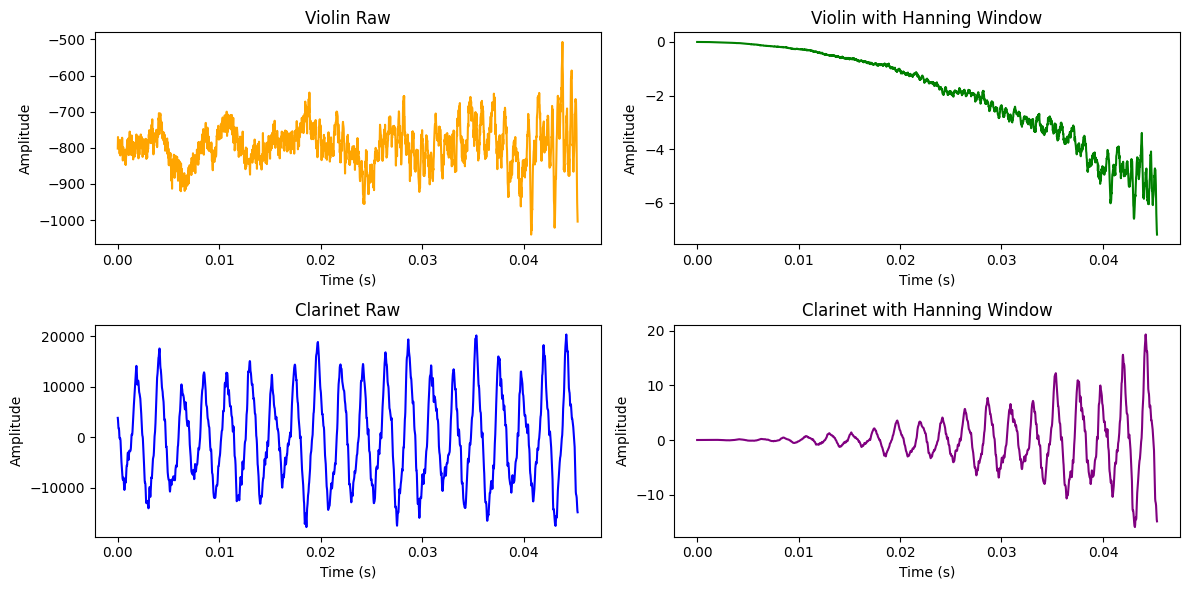

44100


In [137]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

rate_v, vwavedata = wav.read('/Users/connormclaughlin/Python Projects/Physics 281/violin_trunc.wav')
rate_c, cwavedata = wav.read('/Users/connormclaughlin/Python Projects/Physics 281/clarinet.wav')

clarinet_channel = cwavedata[:, 0]

hann_v = vwavedata * np.hanning(len(vwavedata))
hann_c = clarinet_channel * np.hanning(len(clarinet_channel))

time_v = np.arange(len(vwavedata)) / rate_v
time_c = np.arange(len(clarinet_channel)) / rate_c

fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0, 0].plot(time_v[:2000], vwavedata[:2000], color='orange')
ax[0, 0].set_title("Violin Raw")
ax[0, 0].set_xlabel("Time (s)")
ax[0, 0].set_ylabel("Amplitude")

ax[0, 1].plot(time_v[:2000], hann_v[:2000], color='green')
ax[0, 1].set_title("Violin with Hanning Window")
ax[0, 1].set_xlabel("Time (s)")
ax[0, 1].set_ylabel("Amplitude")

ax[1, 0].plot(time_c[:2000], clarinet_channel[:2000], color='blue')
ax[1, 0].set_title("Clarinet Raw")
ax[1, 0].set_xlabel("Time (s)")
ax[1, 0].set_ylabel("Amplitude")

ax[1, 1].plot(time_c[:2000], hann_c[:2000], color='purple')
ax[1, 1].set_title("Clarinet with Hanning Window")
ax[1, 1].set_xlabel("Time (s)")
ax[1, 1].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()
print(rate_v)


(b) (10 points) Generate frequency arrays as you did in Part 1C, and
plot the Fourier coefficients of both violin and clarinet data. The
data for the two sounds are of different length, so you should
either generate different frequency arrays for each, or pick the
shorter of the two and slice the data accordingly. How does the
violin spectrum compare with that of the clarinet?

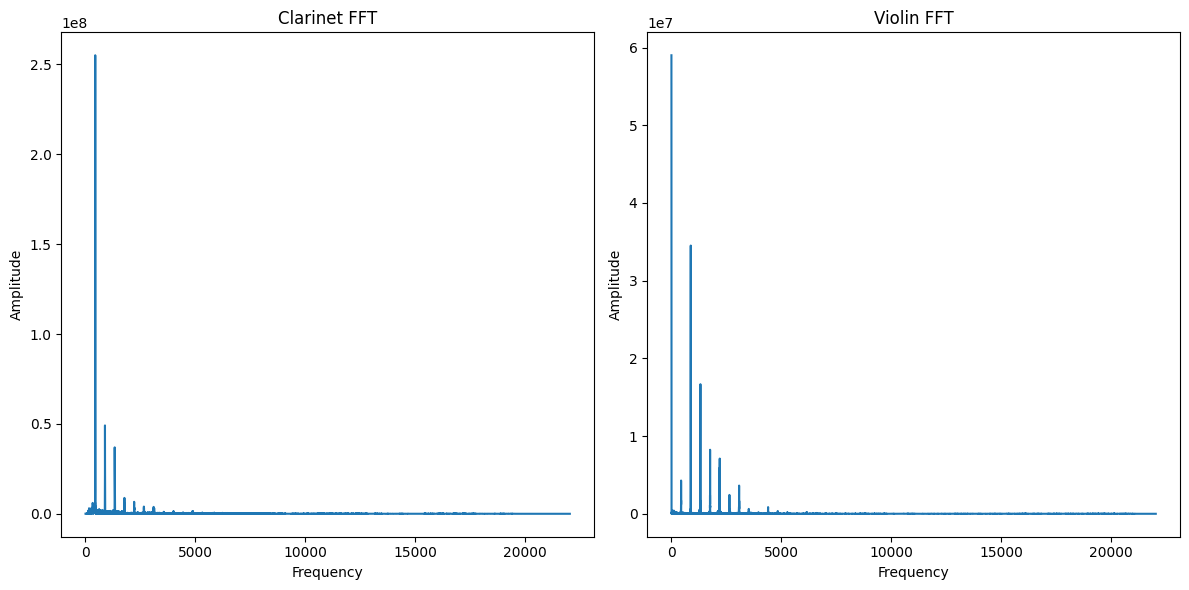

True


In [134]:
import numpy as np
import scipy.fft
from scipy.fft import rfft
import matplotlib.pyplot as plt

violinfft = scipy.fft.rfft(vwavedata[:len(vwavedata)])
clarinetfft2 = scipy.fft.rfft(clarinet_channel[:len(vwavedata)])
violinf = np.abs(violinfft)

Freq =  np.linspace(0, rate_v/2, len(violinfft))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(Freq, np.abs(clarinetfft2))
ax[0].set_xlabel("Frequency")
ax[0].set_ylabel("Amplitude")
ax[0].set_title("Clarinet FFT")

ax[1].plot(Freq, violinf)
ax[1].set_xlabel("Frequency")
ax[1].set_ylabel("Amplitude")
ax[1].set_title("Violin FFT")

plt.tight_layout()
plt.show()

print(len(vwavedata) <= len(cwavedata))
